ETL PIPELINE

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib


In [27]:
df = pd.read_csv('Process_data\diabetes_clean.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_12352\404392616.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('Process_data\diabetes_clean.csv')


,age,gender,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,...,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal
0,0.504956,1,-1.413253,1.138363,5.7,0.824199,0.771162,0,0,0,...,False,False,False,True,True,False,False,True,False,False
1,-0.135884,0,-0.707921,0.285376,6.7,-0.454787,1.095260,0,0,0,...,False,False,True,False,False,False,False,False,False,False
2,0.633124,1,-0.707921,-0.733470,6.4,2.742678,0.852187,1,0,0,...,False,True,False,True,False,False,False,False,False,True
3,1.530299,0,-1.413253,-0.828246,3.4,-0.363431,-0.322667,0,0,0,...,False,False,False,True,False,True,False,False,True,False
4,-0.264052,1,-0.707921,-0.117424,7.2,0.367418,-0.403691,0,0,0,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.264052,1,-0.707921,0.202447,8.3,-0.546144,-0.606252,0,0,0,...,False,True,True,False,False,True,False,False,False,False
99996,-0.584472,0,0.702744,-0.508376,8.8,-0.180719,-0.484715,0,0,0,...,False,False,False,True,False,True,False,True,False,False
99997,0.440872,0,1.408076,0.024741,9.9,-1.825130,0.041943,0,0,1,...,False,False,True,False,False,True,False,True,False,False
99998,-0.199968,0,0.702744,-0.792705,5.9,-0.272075,-2.226739,0,1,0,...,False,False,False,True,False,True,False,False,False,True


In [28]:
import pandas as pd


# Check for missing values
print("Missing values per column:\n", df.isnull().sum().sum())

# Check duplicates
print("Number of duplicates:", df.duplicated().sum())

# Check dtypes
print(df.dtypes.value_counts())


Missing values per column:
 400
Number of duplicates: 0
bool       22
float64    16
int64      11
Name: count, dtype: int64


In [29]:
df

,age,gender,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,...,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal
0,0.504956,1,-1.413253,1.138363,5.7,0.824199,0.771162,0,0,0,...,False,False,False,True,True,False,False,True,False,False
1,-0.135884,0,-0.707921,0.285376,6.7,-0.454787,1.095260,0,0,0,...,False,False,True,False,False,False,False,False,False,False
2,0.633124,1,-0.707921,-0.733470,6.4,2.742678,0.852187,1,0,0,...,False,True,False,True,False,False,False,False,False,True
3,1.530299,0,-1.413253,-0.828246,3.4,-0.363431,-0.322667,0,0,0,...,False,False,False,True,False,True,False,False,True,False
4,-0.264052,1,-0.707921,-0.117424,7.2,0.367418,-0.403691,0,0,0,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.264052,1,-0.707921,0.202447,8.3,-0.546144,-0.606252,0,0,0,...,False,True,True,False,False,True,False,False,False,False
99996,-0.584472,0,0.702744,-0.508376,8.8,-0.180719,-0.484715,0,0,0,...,False,False,False,True,False,True,False,True,False,False
99997,0.440872,0,1.408076,0.024741,9.9,-1.825130,0.041943,0,0,1,...,False,False,True,False,False,True,False,True,False,False
99998,-0.199968,0,0.702744,-0.792705,5.9,-0.272075,-2.226739,0,1,0,...,False,False,False,True,False,True,False,False,False,True


In [30]:
import pandas as pd
import numpy as np



# Separate by type
num_cols = df.select_dtypes(include=['float64','int64']).columns
bool_cols = df.select_dtypes(include=['bool']).columns

# Fill numeric NaNs with median
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Fill boolean NaNs with 0
for col in bool_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(0).astype(int)

# Double check
print("Remaining missing values:", df.isnull().sum().sum())


Remaining missing values: 0


In [31]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns again (exclude target if present)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if "diagnosed_diabetes" in numeric_cols:
    numeric_cols.remove("diagnosed_diabetes")

# Scale
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("✅ All numeric features standardized after imputation.")


✅ All numeric features standardized after imputation.


In [32]:
# Summary of numeric features
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,100000.0,1.442402e-17,1.000005,-2.058404,-0.712640,-0.007716,0.697208,2.555643
gender,100000.0,-6.316725e-17,1.000005,-0.961951,-0.961951,-0.961951,0.895204,2.752359
alcohol_consumption_per_week,100000.0,2.398082e-17,1.000005,-1.413253,-0.707921,-0.002589,0.702744,5.640069
physical_activity_minutes_per_week,100000.0,-4.893863e-18,1.000005,-1.408751,-0.733470,-0.224047,0.486776,8.459836
diet_score,100000.0,2.020073e-16,1.000005,-3.366070,-0.670872,0.002927,0.676727,2.248925
sleep_hours_per_day,100000.0,1.120881e-17,1.000005,-3.652253,-0.637500,0.001993,0.641487,2.742678
screen_time_hours_per_day,100000.0,8.952838e-18,1.000005,-2.226739,-0.687276,0.001431,0.690138,4.376746
family_history_diabetes,100000.0,-5.801581e-17,1.000005,-0.530172,-0.530172,-0.530172,-0.530172,1.886181
hypertension_history,100000.0,-7.222667e-17,1.000005,-0.578582,-0.578582,-0.578582,1.728364,1.728364
cardiovascular_history,100000.0,-2.415845e-17,1.000005,-0.293278,-0.293278,-0.293278,-0.293278,3.409731


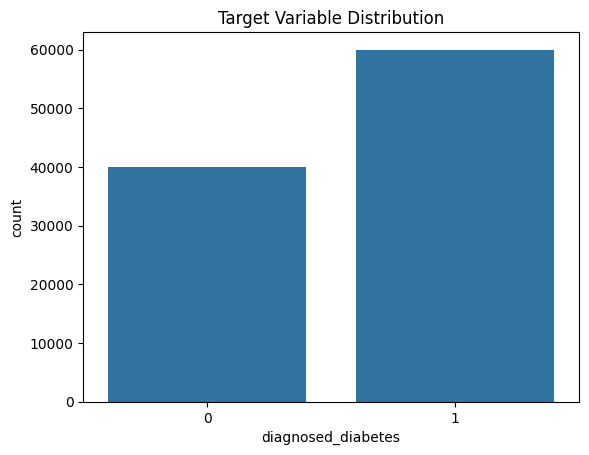

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Diagnosed diabetes distribution
sns.countplot(x="diagnosed_diabetes", data=df)
plt.title("Target Variable Distribution")
plt.show()


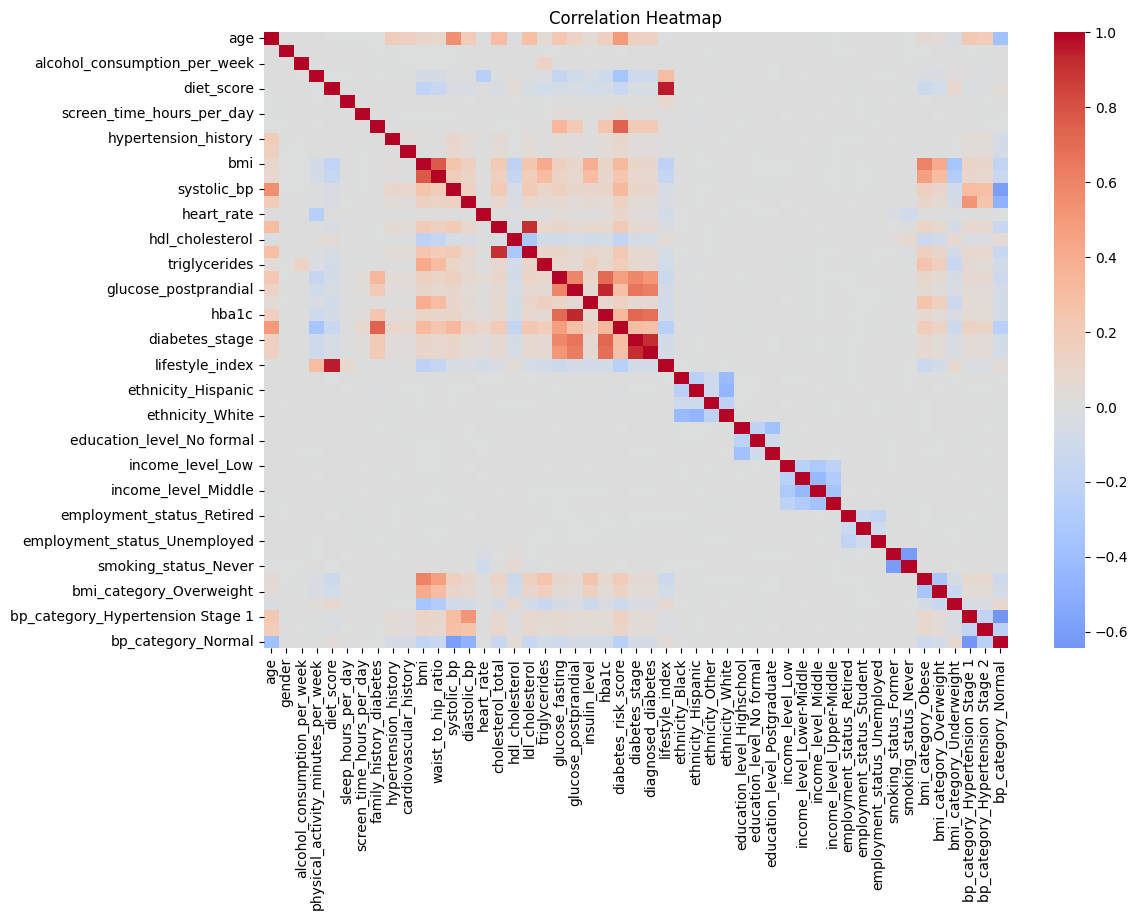

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


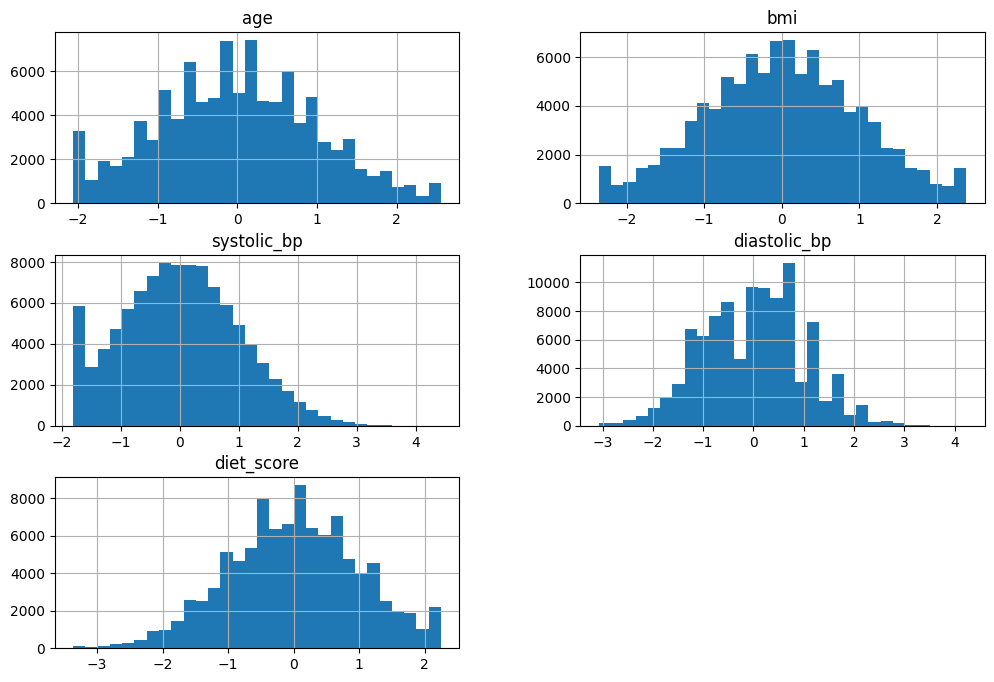

In [35]:
df[['age','bmi','systolic_bp','diastolic_bp','diet_score']].hist(bins=30, figsize=(12,8))
plt.show()


In [36]:
df.to_csv("diabetes_final_standardized.csv", index=False)
print("Final cleaned dataset saved!")
#!/usr/bin/env python3

Final cleaned dataset saved!
